<a href="https://colab.research.google.com/github/Hsuyeon01/ESAA/blob/main/0627_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07. 군집화 

## 1) K-평균 알고리즘 이해

**K 평균**

- 군집화에서 가장 일반적으로 사용되는 알고리즘
- 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

    
**과정**

1. 먼저 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓음, 전체 데이터를 2개로 군집화 하려면 2개의 중심을 임의의 위치에 가져다 놓는 것
2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속
3. 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동
4. 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경
5. 다시 중심을 소속된 데이터의 평균 중심으로 이동
6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료하고, 그렇지 않으면 4번 과정을 거쳐서 소속을 변경하고 과정 반복


**장점**

- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 알고리즘이 쉽고 간결

**단점**

- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
- 몇 개의 군집을 선택해야 할지 가이드하기가 어려움

### 사이킷런 KMeans 클래스 소개

class skelarn.cluster.KMeans(n_clusters=8, init='kmeans++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')

- KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_cluster, 군집화할 개수(군집 중심점의 개수)를 의미
- init는 초기에 군집 중심점의 좌표를 설저할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정
- max_iter는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

군집화와 관련된 주요 속성 정보

- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]), 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있음

### K-평균을 이용한 붓꽃 데이터 세트 군집화

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns = ['sepal_length', 'sepal_width', 
                                                 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
# 붓꽃 데이터 세트를 3개 그룹으로 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [ ]:
# 2차원 평면상에서 개별 데이터이 군집화를 시각적으로 표현
# PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤에 X 좌표, Y 좌표로 개별 데이터를 표현

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


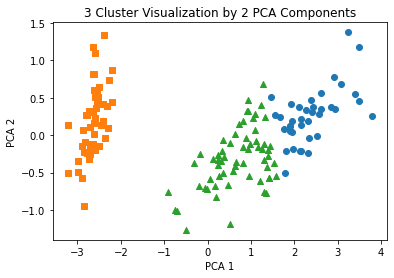

In [ ]:
# 군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o,s,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Cluster Visualization by 2 PCA Components')
plt.show()

Cluster 0과 1의 경우 속성의 위치 자체가 명확히 분리되기 어려운 부분이 존재

### 군집화 알고리즘 테스트를 위한 데이터 생성

대표적인 데이터 생성기 : make_blobs()와 make_classification() API

- 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있음
- make_blobs()는 개별 군집의 중심점과 표준 편차 제어 기능이 추가 돼 있음
- make_classification()은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있음
- 둘 다 분류 용도로 테스트 데이트 생성 가능
- 이 외에 make_circle(), make_moon() API는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는 데 사용됨

make_blobs 

- n_samples : 생성할 총 데이터의 개수, 디폴트는 100개
- n_features : 데이터의 피처 개수, 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처는 y 좌표상에 표현
- centers : int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타냄, 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미함
- cluster_std : 생성될 군집 데이터의 표준 편차를 의미함, 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차는 0.8, 두 번째 군집 내 데이터의 표준편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듦, 군집별로 서로 다른 표준편차를 가진 데이터 세트를 만들 때 사용


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
# 데이터 세트를 DataFrame으로 변경
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


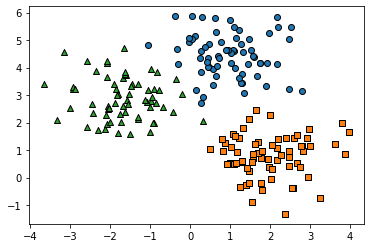

In [ ]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값
markers=['o','s','^','P','D','H','x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target=0, target=1, target=2로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
               marker=markers[target])
plt.show()

In [ ]:
# 군집화 수행 후 군집별 시각화

# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

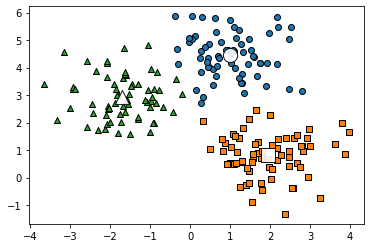

In [ ]:
markers=['o','s','^','P','D','H','x']

# 군집된 label 유형별로 internation 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
               marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=0, color='k', edgecolor='k', 
                marker='$%d$'%label)
    
plt.show()

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


cluster_std가 작을수록 군집 중심에 데이터가 모여 있으며, 클수록 데이터가 퍼져 있음

## 2) 군집 평가

### 실루엣 분석의 개요

실루엣 분석

- 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄 (다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있음)
- 실루엣 분석은 실루엣 계수를 기반으로 함
    - 실루엣 계수 : 개별 데이터가 가지는 군집화 지표
    - 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표

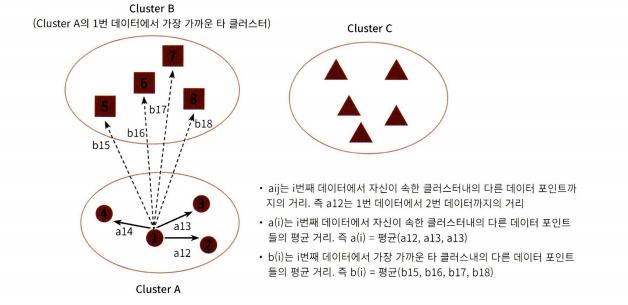

- sklearn.metrics.silhouette_samples(X,labels,metric='euclidean',** kwds) : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환
- sklearn.metrics.silhouette_score(X,labels,metric='euclidean',sample_size=None, ** kwds) : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣 계수 값을 평균해 반환, 즉, np.mean(silhouette_samples()), 일반적으로 이 값이 높을수록 군집화가 어느정도 잘 됐다고 판단할 수 있음, 하지만 무조건 이 값이 높다고 해서 군집화가 잘 됐다고 판단할 수 없음

좋은 군집화 기준

1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 sihouette_score() 값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함, 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요, 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아님


### 붓꽃 데이터 세트를 이용하 군집 평가

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score

iris=load_iris()
irisDF = pd.DataFrame(data=iris.data, columns = ['sepal_length', 'sepal_width', 
                                                 'petal_length', 'petal_width'])
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('sihouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 silhouette Analysis Score : {0:.3f}'.format(average_score))
irisDF.head(3)

sihouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 silhouette Analysis Score : 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

### 군집별 평균 실루엣 계쑤의 시각화를 통한 군집 개수 최적화 방법

개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에 k-평균의 적절한 군집 개수가 설정됐다고 판단할 수 있음

ex) 피처 데이터 세트 X_features에 대해서 군집이 2개일 때와 3개, 4개, 5개일 때의 군집별 평균 실루엣 계수 값을 알고 싶다면

visualize_silhouette([2,3,4,5], X_features)

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10


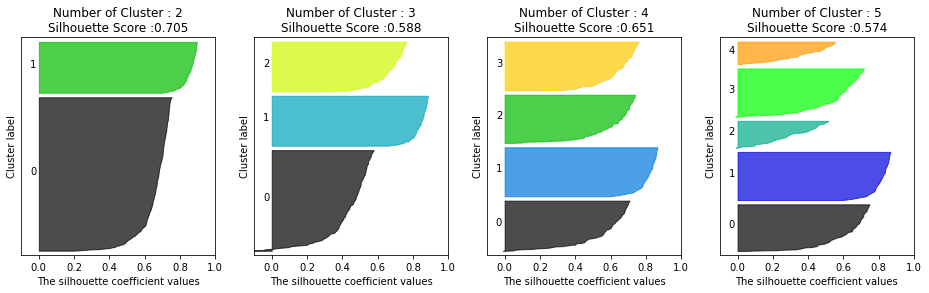

In [ ]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)

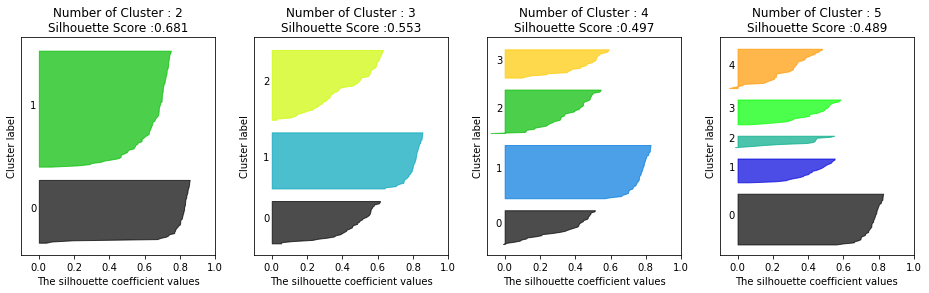

In [ ]:
visualize_silhouette([2,3,4,5],iris.data)

군집 개수 2개로 하는 것이 좋음

실루엣 계수를 통한 K-평균 군집 평가 방법은 각 데이터별로 다른 데이터와의 거리를 반복적으로 계싼해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어남

## 3) 평균 이동

### 평균 이동의 개요

평균 이동 : 중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행, K-평균과 달리 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동 시킴

- 군집 중심점은 데이터 포인트가 모여 있는 곳, 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하여 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE를 이용

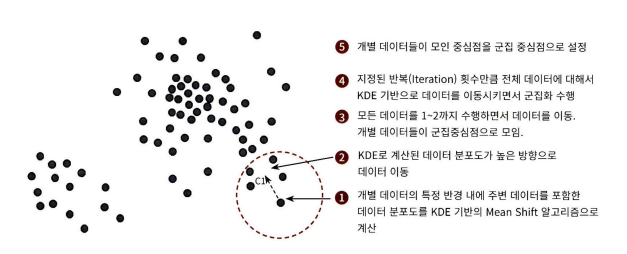

- KDE는 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
    - 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정
    - 확률 밀도 함수는 확률 변수의 분포를 나타내는 함수로, 정규분포를 포함해 감마, t-분포 등이 있음
    - 확률 밀도 함수를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성, 확률 분포 등 변수의 많은 요소를 알 수 있음

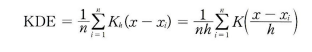

- 대역폭 h는 KDE 형태를 부드러운 형태로 평활화 하는 데 적용, 확률 밀도 추정 성능을 크게 좌우할 수 있음
    - 작은 h값은 좁고 뾰족한 KDE를 가지게 되며, 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합하기 쉬움
    - 매우 큰 h값은 과도하게 평활화된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며 결과적으로 과소적합하기 쉬움
    - 대역폭이 클수록 작은 수의 군집 중심점을 가지며, 대역폭이 적을수록 많은 수의 군집 중심점을 가짐

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2 3 4 5]


In [ ]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값 : ', round(bandwidth,3))

bandwidth 값 :  1.816


In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns = ['ftr1','ftr2'])
clusterDF['target']=y

# estimate_bandwidth()로 최적화 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


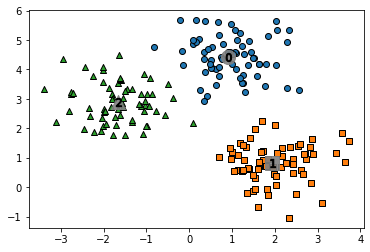

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]

    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
               marker = markers[label])
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9,
               marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
               marker='$%d$' % label)
    
plt.show()

In [ ]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


평균 이동의 장점

- 데이터 세트의 형태를 특정 형태로 가정한다거나, 특정 분포도 기반의 모델로 가정하지 않기 떼문에 좀 더 유연한 군집화가 가능함
- 이상치의 영향력이 크지 않으며 미리 군집의 개수도 정할 필요가 없음

단점 : 알고리즘의 수행 시간이 오래 걸리고, band_width의 크기에 따른 군집화 영향도가 매우 큼

## 4) GMM

### GMM 소개

GMM 군집화

- 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식
- 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주

GMM 모수 추정

- 개별 정규 분포의 평균과 분산
- 각 데이터가 어떤 정규 분포에 해당되는지의 확률
- 모수 추정을 위해 EM 방법을 적용

### GMM을 이용한 붓꽃 데이터 세트 군집화

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

irisDF = pd.DataFrame(data=iris.data, columns = ['sepal_length', 'sepal_width', 
                                                 'petal_length', 'petal_width'])
irisDF['target'] = iris.target

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       2                 48
        0                  2
2       0                 36
        2                 14
Name: kmeans_cluster, dtype: int64


### GMM과 K-평균의 비교

KMeans

- 원형의 범위에서 군집화 수행, 데이터 세트가 원형의 범위를 가질수록 군집화 효율이 높아짐
- 데이터가 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못함

visualuze_cluster_plot()

- clusterobj : 사이킷런의 군집 수행 객체, KMeans나 GaussianMixture의 fit와 predict로 군집화를 완료한 객체, 만약 군집화 결과 시각화가 아니고 make_blobs로 생성한 데이터의 시각화일 경우 None 입력
- dataframe : 피처 데이터 세트와 label 값을 가진 DataFrame
- label_name : 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼 명, make_blobs() 결과 시각화일 경우는 dataframe 내의 target 칼럼 명
- iscenter : 사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False

In [ ]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

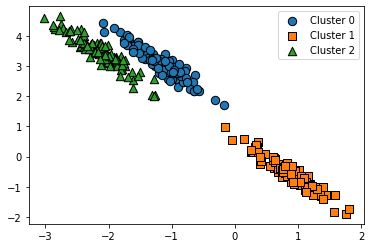

In [ ]:
from sklearn.datasets import make_blobs

# make_blobs로 300개의 데이터 세트, 3개의 군집 세트, clsuter_std=0.5를 만듦
X,y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환
transformation = [[0.60834549, -0.63667341],[-0.40887718,0.85283229]]
X_aniso = np.dot(X,transformation)
# feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target']=y
# 생성된 데이터 세트를 target 별로 다른 마커로 표시해 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

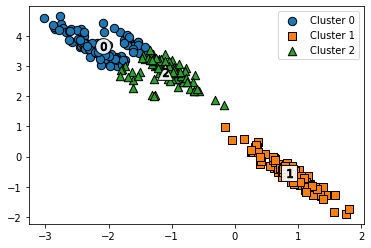

In [ ]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 작용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

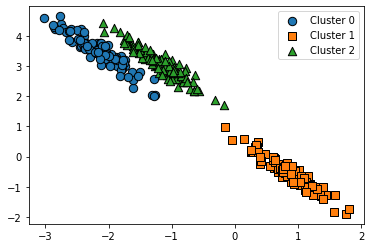

In [ ]:
# 3개의 n_components 기반으로 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers 속성이 없으므로 iscluster를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

In [ ]:
print('#### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n#### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

#### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

#### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


GMM의 경우는 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있음
하지만 수행시간이 오래 걸린다는 단점이 있음

## 05) DBSCAN

### DBSCAN 개요

DBSCAN

- 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능
- 입실론 주변 영역 : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수 : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

데이터 포인트

- 핵심 포인트 : 주변 영역 내의 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우
- 이웃 포인트 : 주변 영역 내에 위치한 타 데이터
- 경계 포인트 : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
- 잡음 포인트 : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터

사이킷런 DBSCAN 클래스의 초기화 파라미터

- eps : 입실론 주변 영역의 반경
- min_samples : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미 (자신의 데이터를 포함, min points + 1)


### DBSCAN 적용하기 - 붓꽃 데이터 세트 


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


- 군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미
- DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 군집의 개수를 지정하는 것은 무의미함

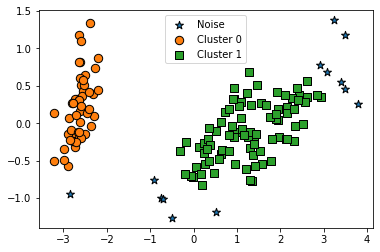

In [ ]:
from sklearn.decomposition  import PCA
# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_clsuter_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋음
- eps 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아짐
- min_samples 를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커짐

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


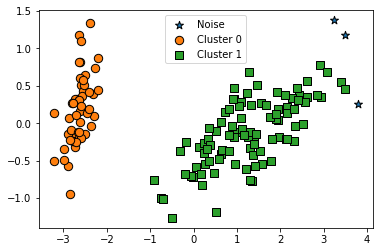

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8,min_samples=8,metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


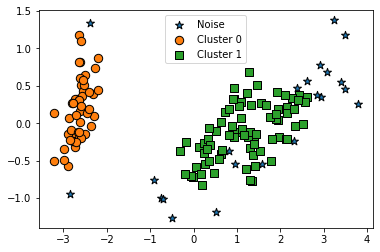

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### DBSCAN 적용하기 - make_circles() 데이터 세트

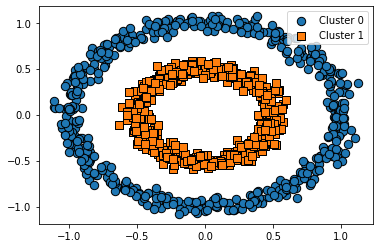

In [ ]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=1000,shuffle=True,noise=0.05,random_state=0,factor=0.5)
clusterDF = pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

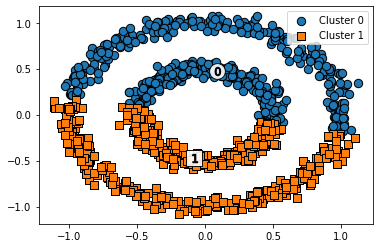

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,max_iter=1000,random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = kmeans_labels

visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=True)

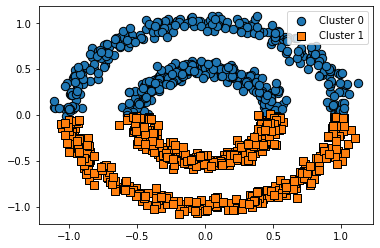

In [ ]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

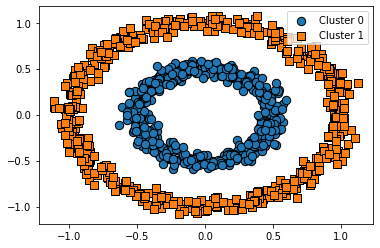

In [ ]:
#DBSCAM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_label = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_label

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)